<a href="https://colab.research.google.com/github/SolarHO/FX_predict/blob/main/another_model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#데이터 불러오기
df = pd.read_csv("병합ver3.csv")
df['날짜'] = pd.to_datetime(df['날짜'])

#1 GRU model

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0433 - val_loss: 0.0415
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0096 - val_loss: 0.0414
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0085 - val_loss: 0.0445
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0063 - val_loss: 0.0234
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0045 - val_loss: 0.0143
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0037 - val_loss: 0.0122
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0031 - val_loss: 0.0224
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - val_loss: 0.0161
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0206
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023 - val_loss: 0.0171
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0024 - val_loss: 0.0173
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-5e10ce1d7bde>:59: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

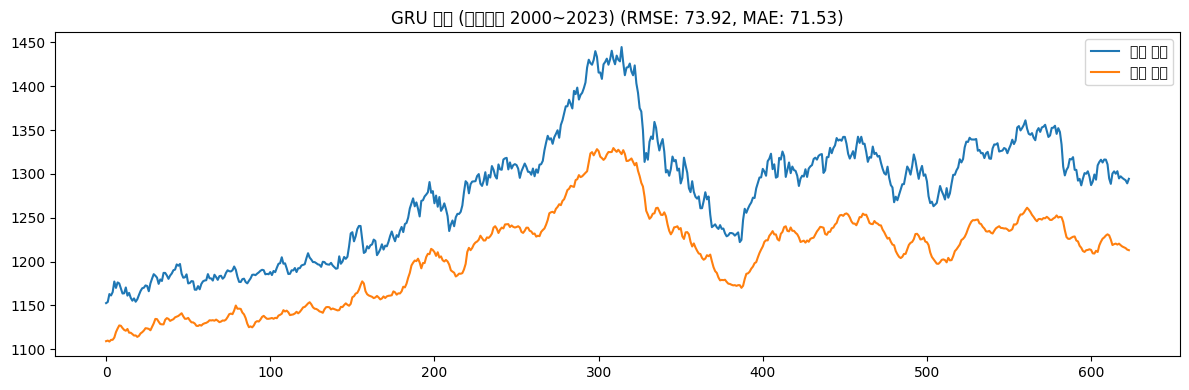

{'Model': 'GRU 모델 (전체기간 2000~2023)', 'RMSE': np.float64(73.92012828739672), 'MAE': 71.53161295634244}


In [ ]:
#사용할 변수
features = ['USD/KRW', 'Dollar_Index', 'CRB', 'VIX',
 'KOSPI', 'NASDAQ', 'S&P500', 'WTI', 'Gold', 'US10Y']
seq_len = 10

#시퀀스 생성 함수
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#GRU 모델 학습 함수
def train_gru_model(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        GRU(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=1)

    # 예측
    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # 시각화
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='실제 환율')
    plt.plot(pred_rescaled, label='예측 환율')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

#전체 기간 (2000~2023) 학습 실행
df_all = df[(df['날짜'] >= "2000-01-01") & (df['날짜'] <= "2023-12-31")].copy()
result_gru_all = train_gru_model(df_all, "GRU 모델 (전체기간 2000~2023)")
print(result_gru_all)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0470 - val_loss: 0.0227
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - val_loss: 0.0422
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0074 - val_loss: 0.0140
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0063 - val_loss: 0.0130
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0057 - val_loss: 0.0169
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047 - val_loss: 0.0160
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - val_loss: 0.0163
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0045 - val_loss: 0.0184
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - val_loss: 0.0169
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-e8f358cb97b5>:58: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

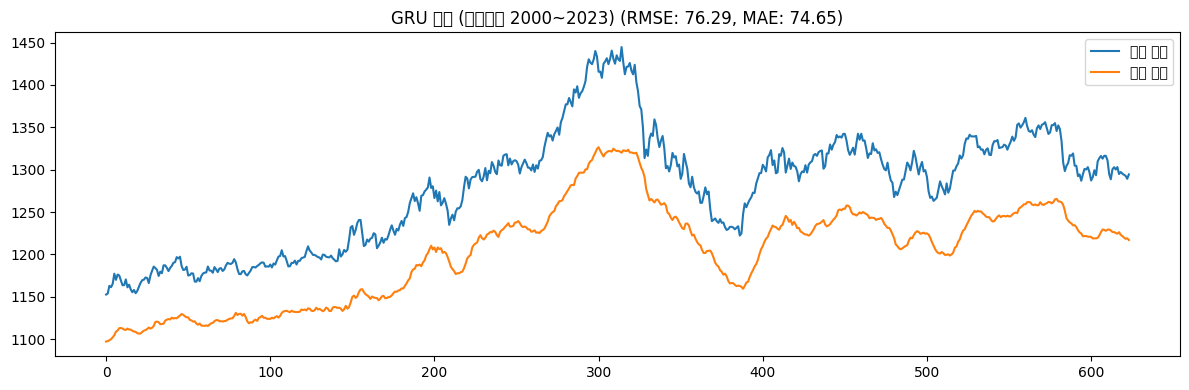

{'Model': 'GRU 모델 (전체기간 2000~2023)', 'RMSE': np.float64(76.29129905527022), 'MAE': 74.6467795364177}


In [ ]:
#사용할 변수 (상위 5개)
features = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold']
seq_len = 10

#시퀀스 생성 함수
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#GRU 모델 학습 함수
def train_gru_model(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        GRU(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=1)

    # 예측
    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # 시각화
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='실제 환율')
    plt.plot(pred_rescaled, label='예측 환율')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

#전체 기간 (2000~2023) 학습 실행
df_all = df[(df['날짜'] >= "2000-01-01") & (df['날짜'] <= "2023-12-31")].copy()
result_gru_all = train_gru_model(df_all, "GRU 모델 (전체기간 2000~2023)")
print(result_gru_all)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0814 - val_loss: 0.0119
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0221 - val_loss: 0.0030
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0242 - val_loss: 0.0023
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - val_loss: 0.0027
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0252 - val_loss: 0.0022
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0239 - val_loss: 0.0032
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173 - val_loss: 0.0029
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0217 - val_loss: 0.0057
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0266 - val_loss: 0.0021
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0183 - val_loss: 0.0020
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186 - val_loss: 0.0020
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0188 - val_l

<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-a06ba9ab02e3>:58: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

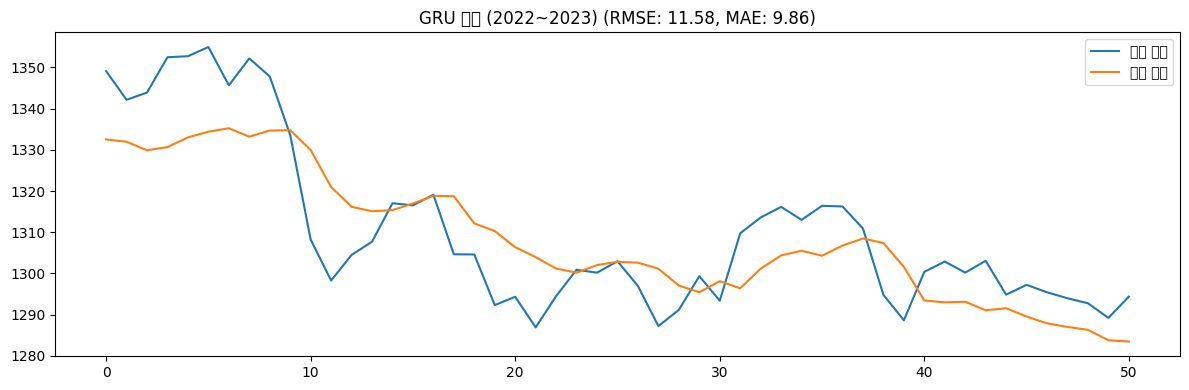

{'Model': 'GRU 모델 (2022~2023)', 'RMSE': np.float64(11.578442748250545), 'MAE': 9.86223477964309}


In [ ]:
# 상위 5개 변수
features = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold']
seq_len = 10

# 시퀀스 생성 함수
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])  # 항상 첫 번째가 타겟
    return np.array(X), np.array(y)

# GRU 모델 학습 함수
def train_gru_model(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        GRU(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=1)

    # 예측
    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # 시각화
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='실제 환율')
    plt.plot(pred_rescaled, label='예측 환율')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

#실험 실행: 2022~2023 데이터로 학습
df_gru = df[(df['날짜'] >= "2022-01-01") & (df['날짜'] <= "2023-12-31")].copy()
result_gru = train_gru_model(df_gru, "GRU 모델 (2022~2023)")
print(result_gru)


#DLinear

In [ ]:
!pip install einops
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 9.2 MB/s eta 0:00:00


[1/20] Loss: 0.0071
[2/20] Loss: 0.0010
[3/20] Loss: 0.0009
[4/20] Loss: 0.0009
[5/20] Loss: 0.0009
[6/20] Loss: 0.0009
[7/20] Loss: 0.0009
[8/20] Loss: 0.0009
[9/20] Loss: 0.0009
[10/20] Loss: 0.0009
[11/20] Loss: 0.0009
[12/20] Loss: 0.0009
[13/20] Loss: 0.0009
[14/20] Loss: 0.0009
[15/20] Loss: 0.0009
[16/20] Loss: 0.0009
[17/20] Loss: 0.0009
[18/20] Loss: 0.0009
[19/20] Loss: 0.0009
[20/20] Loss: 0.0009


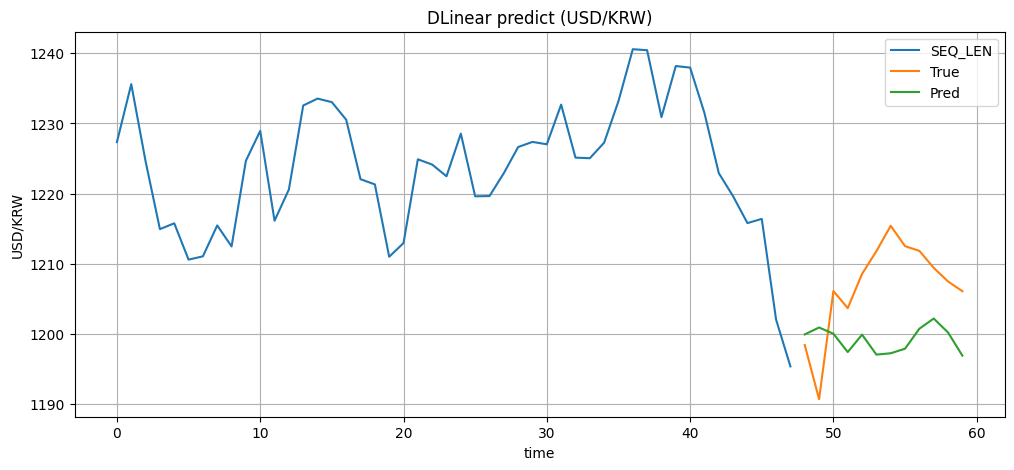

✅ RMSE: 10.5419
✅ MAE : 9.5941


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from einops import rearrange
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim=1, individual=False):
        super(DLinear, self).__init__()
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.individual = individual
        self.channels = input_dim

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList([nn.Linear(self.seq_len, self.pred_len) for _ in range(self.channels)])
            self.Linear_Trend = nn.ModuleList([nn.Linear(self.seq_len, self.pred_len) for _ in range(self.channels)])
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        seasonal_init, trend_init = self.decomposition(x)

        if self.individual:
            seasonal_output = torch.stack([self.Linear_Seasonal[i](seasonal_init[:, :, i]) for i in range(self.channels)], dim=-1)
            trend_output = torch.stack([self.Linear_Trend[i](trend_init[:, :, i]) for i in range(self.channels)], dim=-1)
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init.permute(0, 2, 1)).permute(0, 2, 1)
            trend_output = self.Linear_Trend(trend_init.permute(0, 2, 1)).permute(0, 2, 1)

        return seasonal_output + trend_output + seq_last

    def decomposition(self, x):
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        return seasonal, trend

# Dataset 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len=10, pred_len=1):
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.data = series
        self.samples = []
        for i in range(len(series) - seq_len - pred_len):
            seq_x = series[i:i + seq_len]
            seq_y = series[i + seq_len:i + seq_len + pred_len]
            self.samples.append((seq_x, seq_y))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x, y = self.samples[idx]
        return torch.tensor(x, dtype=torch.float32).unsqueeze(-1), torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

# 데이터 불러오기 및 전처리
df = pd.read_csv('/content/병합ver3.csv')
df = df[['날짜', 'USD/KRW']].dropna()
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

usd_series = df['USD/KRW'].values.reshape(-1, 1)

# 정규화
scaler = MinMaxScaler()
usd_scaled = scaler.fit_transform(usd_series).flatten()

# 하이퍼파라미터 설정
SEQ_LEN = 48
PRED_LEN = 12
BATCH_SIZE = 32
EPOCHS = 20
LR = 1e-3

# 학습/테스트 분리
train_size = int(len(usd_scaled) * 0.8)
train_dataset = TimeSeriesDataset(usd_scaled[:train_size], SEQ_LEN, PRED_LEN)
test_dataset = TimeSeriesDataset(usd_scaled[train_size:], SEQ_LEN, PRED_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 모델 초기화
model = DLinear(seq_len=SEQ_LEN, pred_len=PRED_LEN, input_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# 학습 루프
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[{epoch+1}/{EPOCHS}] Loss: {total_loss / len(train_loader):.4f}")

# 예측 시각화
model.eval()
with torch.no_grad():
    for x, y in test_loader:
        pred = model(x)
        break

x_usd = x[0].squeeze(-1).numpy()           # (48,)
y_usd = y[0].squeeze(-1).numpy()           # (12,)
pred_usd = pred[0].squeeze(-1).numpy()     # (12,)

# 정규화 해제
true_all = scaler.inverse_transform(np.concatenate([x_usd, y_usd]).reshape(-1, 1)).flatten()
pred_all = scaler.inverse_transform(np.concatenate([x_usd, pred_usd]).reshape(-1, 1)).flatten()

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(range(SEQ_LEN), true_all[:SEQ_LEN], label='SEQ_LEN')
plt.plot(range(SEQ_LEN, SEQ_LEN + PRED_LEN), true_all[SEQ_LEN:], label='True')
plt.plot(range(SEQ_LEN, SEQ_LEN + PRED_LEN), pred_all[SEQ_LEN:], label='Pred')
plt.title('DLinear predict (USD/KRW)')
plt.xlabel('time')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.show()

# 예측 대상 부분만 추출
y_true = true_all[SEQ_LEN:]
y_pred = pred_all[SEQ_LEN:]
rmse = mean_squared_error(y_true, y_pred) ** 0.5
mae = mean_absolute_error(y_true, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE : {mae:.4f}")


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import optuna

# DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim=1):
        super(DLinear, self).__init__()
        self.Linear_Seasonal = nn.Linear(seq_len, pred_len)
        self.Linear_Trend = nn.Linear(seq_len, pred_len)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend

        seasonal_output = self.Linear_Seasonal(seasonal.permute(0,2,1)).permute(0,2,1)
        trend_output = self.Linear_Trend(trend.permute(0,2,1)).permute(0,2,1)

        return seasonal_output + trend_output + seq_last

# Dataset 클래스
class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len, pred_len):
        self.X, self.Y = [], []
        for i in range(len(series) - seq_len - pred_len):
            self.X.append(series[i:i+seq_len])
            self.Y.append(series[i+seq_len:i+seq_len+pred_len])
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32).unsqueeze(-1)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

usd = df['USD/KRW'].values.reshape(-1, 1)

scaler = MinMaxScaler()
usd_scaled = scaler.fit_transform(usd).flatten()

train_size = int(len(usd_scaled) * 0.8)
train_series = usd_scaled[:train_size]
test_series = usd_scaled[train_size:]

# Optuna 목적 함수
def objective(trial):
    # 하이퍼파라미터 샘플링
    seq_len = trial.suggest_int("seq_len", 24, 96, step=12)
    pred_len = trial.suggest_int("pred_len", 5, 20)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = 10

    # 데이터셋 구성
    train_ds = TimeSeriesDataset(train_series, seq_len, pred_len)
    test_ds = TimeSeriesDataset(test_series, seq_len, pred_len)
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    test_dl = DataLoader(test_ds, batch_size=1)

    # 모델 초기화
    model = DLinear(seq_len, pred_len)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # 학습
    for epoch in range(epochs):
        model.train()
        for x, y in train_dl:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()

    # 평가
    model.eval()
    with torch.no_grad():
        for x, y in test_dl:
            pred = model(x)
            break

    true = scaler.inverse_transform(np.concatenate([x[0].squeeze(-1).numpy(), y[0].squeeze(-1).numpy()]).reshape(-1, 1)).flatten()
    pred = scaler.inverse_transform(np.concatenate([x[0].squeeze(-1).numpy(), pred[0].squeeze(-1).numpy()]).reshape(-1, 1)).flatten()

    rmse = mean_squared_error(true[-pred_len:], pred[-pred_len:]) ** 0.5
    return rmse

# ptuna 튜닝 실행
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# 결과 출력
print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)


[I 2025-06-01 13:07:13,725] A new study created in memory with name: no-name-96e5a4f1-575b-4ddf-8856-cca9c23d4987
<ipython-input-11-3589b1b9e5db>:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
[I 2025-06-01 13:07:15,437] Trial 0 finished with value: 4.557344423987783 and parameters: {'seq_len': 96, 'pred_len': 13, 'lr': 0.0003526221986216972, 'batch_size': 64}. Best is trial 0 with value: 4.557344423987783.
<ipython-input-11-3589b1b9e5db>:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
[I 2025-06-01 13:07:19,871] Trial 1 finished with value: 8.702365807887926 and paramet

Best RMSE: 3.1724567349657415
Best Params: {'seq_len': 96, 'pred_len': 5, 'lr': 0.00020605303810428396, 'batch_size': 16}


#1 best param
입력 기간 96

예측 기간 5

<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-db0d293d483f>:101: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<i

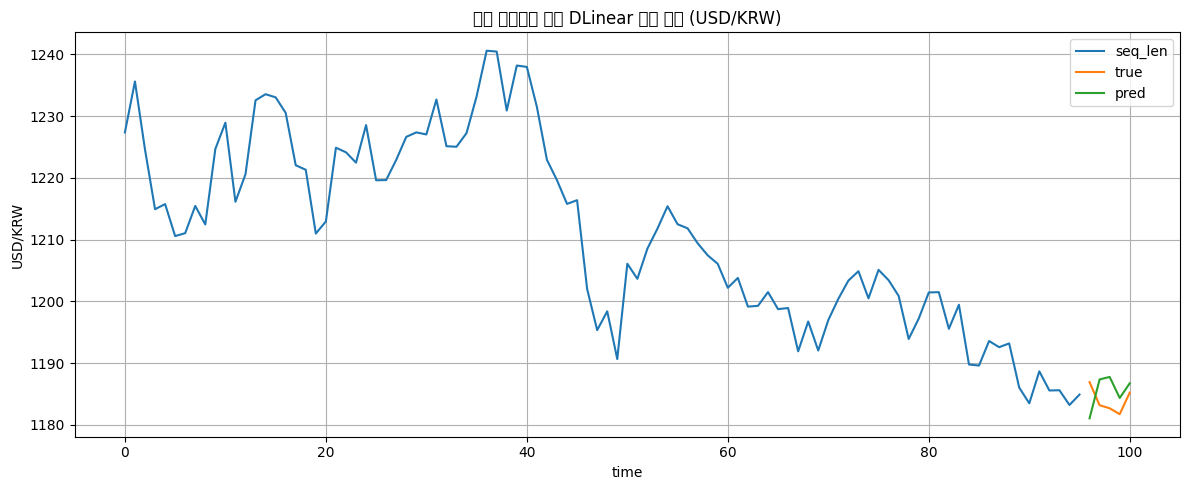

✅ RMSE: 4.1672
✅ MAE : 3.8510


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 베스트 파라미터 설정
best_seq_len = 96
best_pred_len = 5
best_lr = 0.00020605303810428396
best_batch_size = 16
best_epochs = 20  # 필요시 조정 가능

# DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim=1):
        super(DLinear, self).__init__()
        self.Linear_Seasonal = nn.Linear(seq_len, pred_len)
        self.Linear_Trend = nn.Linear(seq_len, pred_len)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend

        seasonal_output = self.Linear_Seasonal(seasonal.permute(0,2,1)).permute(0,2,1)
        trend_output = self.Linear_Trend(trend.permute(0,2,1)).permute(0,2,1)

        return seasonal_output + trend_output + seq_last

# Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len, pred_len):
        self.X, self.Y = [], []
        for i in range(len(series) - seq_len - pred_len):
            self.X.append(series[i:i+seq_len])
            self.Y.append(series[i+seq_len:i+seq_len+pred_len])
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32).unsqueeze(-1)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

# 데이터 불러오기 및 정규화

usd = df['USD/KRW'].values.reshape(-1, 1)
scaler = MinMaxScaler()
usd_scaled = scaler.fit_transform(usd).flatten()

train_size = int(len(usd_scaled) * 0.8)
train_series = usd_scaled[:train_size]
test_series = usd_scaled[train_size:]

# 학습 및 테스트 데이터셋
train_ds = TimeSeriesDataset(train_series, best_seq_len, best_pred_len)
test_ds = TimeSeriesDataset(test_series, best_seq_len, best_pred_len)
train_dl = DataLoader(train_ds, batch_size=best_batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=1)

# 모델 학습
model = DLinear(best_seq_len, best_pred_len)
optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
criterion = nn.MSELoss()

for epoch in range(best_epochs):
    model.train()
    for x, y in train_dl:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

#예측 및 시각화
model.eval()
with torch.no_grad():
    x, y = next(iter(test_dl))
    pred = model(x)

# 역정규화 후 시각화용 배열 구성
x_np = x[0].squeeze(-1).numpy()
y_np = y[0].squeeze(-1).numpy()
pred_np = pred[0].squeeze(-1).numpy()

true_all = scaler.inverse_transform(np.concatenate([x_np, y_np]).reshape(-1, 1)).flatten()
pred_all = scaler.inverse_transform(np.concatenate([x_np, pred_np]).reshape(-1, 1)).flatten()

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(range(best_seq_len), true_all[:best_seq_len], label='seq_len')
plt.plot(range(best_seq_len, best_seq_len + best_pred_len), true_all[best_seq_len:], label='true')
plt.plot(range(best_seq_len, best_seq_len + best_pred_len), pred_all[best_seq_len:], label='pred')
plt.title('최적 파라미터 기반 DLinear 예측 결과 (USD/KRW)')
plt.xlabel('time')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = true_all[best_seq_len:]
y_pred = pred_all[best_seq_len:]

# RMSE 및 MAE 계산
rmse = mean_squared_error(y_true, y_pred) ** 0.5
mae = mean_absolute_error(y_true, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE : {mae:.4f}")


In [ ]:
# DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim=1):
        super(DLinear, self).__init__()
        self.Linear_Seasonal = nn.Linear(seq_len, pred_len)
        self.Linear_Trend = nn.Linear(seq_len, pred_len)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        seasonal_output = self.Linear_Seasonal(seasonal.permute(0,2,1)).permute(0,2,1)
        trend_output = self.Linear_Trend(trend.permute(0,2,1)).permute(0,2,1)
        return seasonal_output + trend_output + seq_last

scaler = MinMaxScaler()
usd_scaled = scaler.fit_transform(usd).flatten()

# 파라미터
seq_len = 96
pred_len = 5
lr = 0.0002
batch_size = 16
epochs = 20

# 데이터셋 구성
train_size = int(len(usd_scaled) * 0.8)
train_data = usd_scaled[:train_size]
test_data = usd_scaled[train_size:]

class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len, pred_len):
        self.X, self.Y = [], []
        for i in range(len(series) - seq_len - pred_len):
            self.X.append(series[i:i+seq_len])
            self.Y.append(series[i+seq_len:i+seq_len+pred_len])
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32).unsqueeze(-1)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = TimeSeriesDataset(train_data, seq_len, pred_len)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# 모델 학습
model = DLinear(seq_len, pred_len)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

for epoch in range(epochs):
    model.train()
    for x, y in train_dl:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

# 전체 테스트셋에 대해 슬라이딩 반복 예측
true_all, pred_all = [], []

model.eval()
with torch.no_grad():
    for i in range(0, len(test_data) - seq_len - pred_len + 1):
        x_seq = test_data[i:i+seq_len].reshape(1, seq_len, 1)
        y_seq = test_data[i+seq_len:i+seq_len+pred_len].reshape(pred_len, 1)

        x_tensor = torch.tensor(x_seq, dtype=torch.float32)
        pred_tensor = model(x_tensor).squeeze(0).numpy()

        y_true_inv = scaler.inverse_transform(y_seq)
        y_pred_inv = scaler.inverse_transform(pred_tensor)

        true_all.extend(y_true_inv.flatten())
        pred_all.extend(y_pred_inv.flatten())

# 평가 지표 계산
rmse = mean_squared_error(true_all, pred_all) ** 0.5
mae = mean_absolute_error(true_all, pred_all)

print(f"✅ 전체 테스트셋 기준 RMSE: {rmse:.4f}")
print(f"✅ 전체 테스트셋 기준 MAE : {mae:.4f}")


✅ 전체 테스트셋 기준 RMSE: 12.2785
✅ 전체 테스트셋 기준 MAE : 9.0710


<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-c2d8882d7ee7>:20: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-

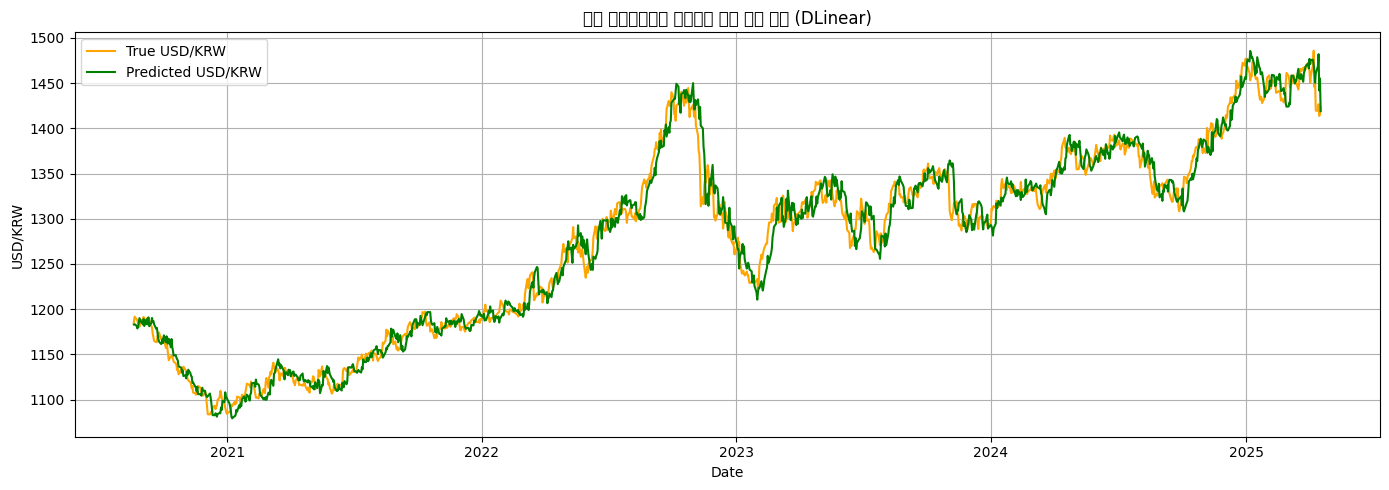

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예측 중 마지막 step만 추출 (pred_len 간격으로 슬라이싱)
true_final = np.array(true_all)[pred_len-1::pred_len]
pred_final = np.array(pred_all)[pred_len-1::pred_len]

# 예측 대상 날짜 생성
date_range = df['날짜'].values[train_size + seq_len + pred_len - 1 : train_size + seq_len + pred_len - 1 + len(true_final)]

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(date_range, true_final, label='True USD/KRW', color='orange')
plt.plot(date_range, pred_final, label='Predicted USD/KRW', color='green')
plt.title('전체 테스트셋에서 슬라이딩 방식 예측 결과 (DLinear)')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


입력 기간 96

예측 기간 1

<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-baf8b04781dd>:93: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-

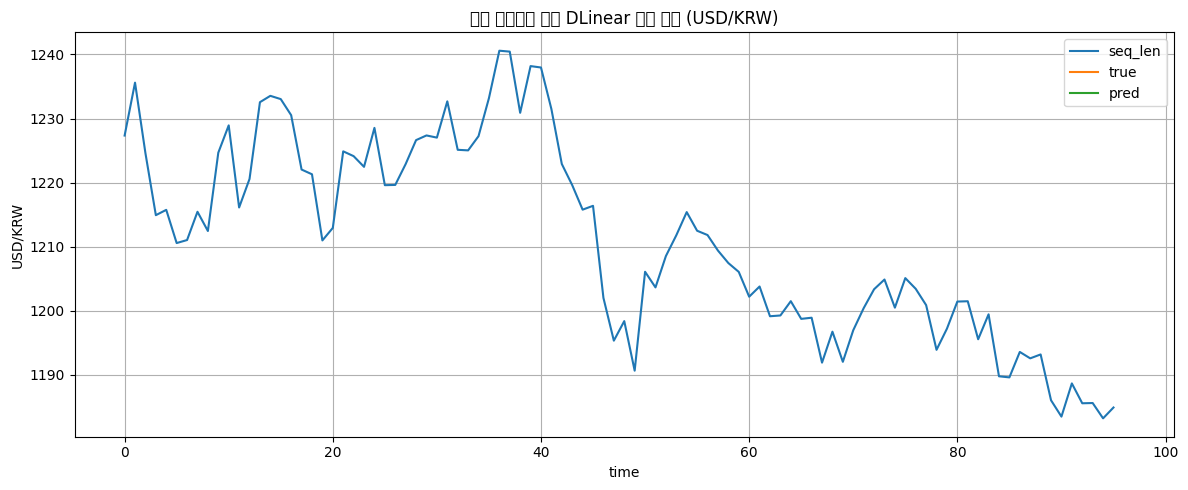

✅ RMSE: 3.3514
✅ MAE : 3.3514


In [ ]:
# 파라미터 설정
best_seq_len = 96
best_pred_len = 1
best_lr = 0.00020605303810428396
best_batch_size = 16
best_epochs = 20

# DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim=1):
        super(DLinear, self).__init__()
        self.Linear_Seasonal = nn.Linear(seq_len, pred_len)
        self.Linear_Trend = nn.Linear(seq_len, pred_len)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend

        seasonal_output = self.Linear_Seasonal(seasonal.permute(0,2,1)).permute(0,2,1)
        trend_output = self.Linear_Trend(trend.permute(0,2,1)).permute(0,2,1)

        return seasonal_output + trend_output + seq_last

# Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len, pred_len):
        self.X, self.Y = [], []
        for i in range(len(series) - seq_len - pred_len):
            self.X.append(series[i:i+seq_len])
            self.Y.append(series[i+seq_len:i+seq_len+pred_len])
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32).unsqueeze(-1)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

# 데이터 불러오기 및 정규화

usd = df['USD/KRW'].values.reshape(-1, 1)
scaler = MinMaxScaler()
usd_scaled = scaler.fit_transform(usd).flatten()

train_size = int(len(usd_scaled) * 0.8)
train_series = usd_scaled[:train_size]
test_series = usd_scaled[train_size:]

# 학습 및 테스트 데이터셋
train_ds = TimeSeriesDataset(train_series, best_seq_len, best_pred_len)
test_ds = TimeSeriesDataset(test_series, best_seq_len, best_pred_len)
train_dl = DataLoader(train_ds, batch_size=best_batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=1)

# 모델 학습
model = DLinear(best_seq_len, best_pred_len)
optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
criterion = nn.MSELoss()

for epoch in range(best_epochs):
    model.train()
    for x, y in train_dl:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

#예측 및 시각화
model.eval()
with torch.no_grad():
    x, y = next(iter(test_dl))
    pred = model(x)

# 역정규화 후 시각화용 배열 구성
x_np = x[0].squeeze(-1).numpy()
y_np = y[0].squeeze(-1).numpy()
pred_np = pred[0].squeeze(-1).numpy()

true_all = scaler.inverse_transform(np.concatenate([x_np, y_np]).reshape(-1, 1)).flatten()
pred_all = scaler.inverse_transform(np.concatenate([x_np, pred_np]).reshape(-1, 1)).flatten()

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(range(best_seq_len), true_all[:best_seq_len], label='seq_len')
plt.plot(range(best_seq_len, best_seq_len + best_pred_len), true_all[best_seq_len:], label='true')
plt.plot(range(best_seq_len, best_seq_len + best_pred_len), pred_all[best_seq_len:], label='pred')
plt.title('최적 파라미터 기반 DLinear 예측 결과 (USD/KRW)')
plt.xlabel('time')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = true_all[best_seq_len:]
y_pred = pred_all[best_seq_len:]

# RMSE 및 MAE 계산
rmse = mean_squared_error(y_true, y_pred) ** 0.5
mae = mean_absolute_error(y_true, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE : {mae:.4f}")


In [ ]:
# DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim=1):
        super(DLinear, self).__init__()
        self.Linear_Seasonal = nn.Linear(seq_len, pred_len)
        self.Linear_Trend = nn.Linear(seq_len, pred_len)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        seasonal_output = self.Linear_Seasonal(seasonal.permute(0,2,1)).permute(0,2,1)
        trend_output = self.Linear_Trend(trend.permute(0,2,1)).permute(0,2,1)
        return seasonal_output + trend_output + seq_last

scaler = MinMaxScaler()
usd_scaled = scaler.fit_transform(usd).flatten()

# 파라미터
seq_len = 96
pred_len = 1
lr = 0.0002
batch_size = 16
epochs = 20

# 데이터셋 구성
train_size = int(len(usd_scaled) * 0.8)
train_data = usd_scaled[:train_size]
test_data = usd_scaled[train_size:]

class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len, pred_len):
        self.X, self.Y = [], []
        for i in range(len(series) - seq_len - pred_len):
            self.X.append(series[i:i+seq_len])
            self.Y.append(series[i+seq_len:i+seq_len+pred_len])
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32).unsqueeze(-1)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = TimeSeriesDataset(train_data, seq_len, pred_len)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# 모델 학습
model = DLinear(seq_len, pred_len)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

for epoch in range(epochs):
    model.train()
    for x, y in train_dl:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

# 전체 테스트셋에 대해 슬라이딩 반복 예측
true_all, pred_all = [], []

model.eval()
with torch.no_grad():
    for i in range(0, len(test_data) - seq_len - pred_len + 1):
        x_seq = test_data[i:i+seq_len].reshape(1, seq_len, 1)
        y_seq = test_data[i+seq_len:i+seq_len+pred_len].reshape(pred_len, 1)

        x_tensor = torch.tensor(x_seq, dtype=torch.float32)
        pred_tensor = model(x_tensor).squeeze(0).numpy()

        y_true_inv = scaler.inverse_transform(y_seq)
        y_pred_inv = scaler.inverse_transform(pred_tensor)

        true_all.extend(y_true_inv.flatten())
        pred_all.extend(y_pred_inv.flatten())

# 평가 지표 계산
rmse = mean_squared_error(true_all, pred_all) ** 0.5
mae = mean_absolute_error(true_all, pred_all)

print(f"✅ 전체 테스트셋 기준 RMSE: {rmse:.4f}")
print(f"✅ 전체 테스트셋 기준 MAE : {mae:.4f}")


✅ 전체 테스트셋 기준 RMSE: 7.5696
✅ 전체 테스트셋 기준 MAE : 5.7432


<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-c2d8882d7ee7>:20: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-

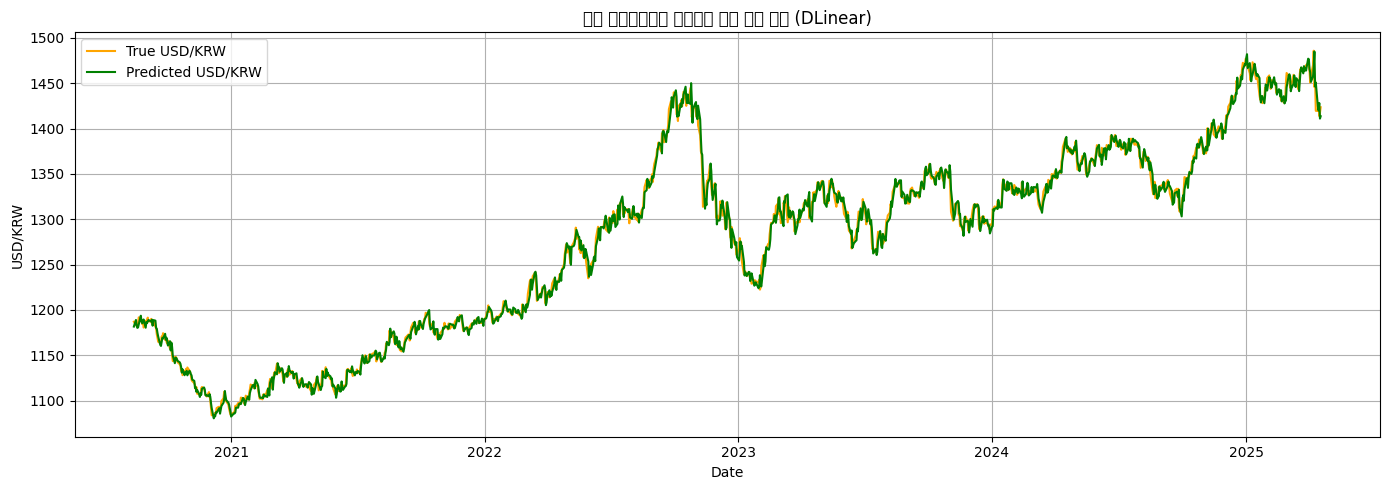

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예측 중 마지막 step만 추출 (pred_len 간격으로 슬라이싱)
true_final = np.array(true_all)[pred_len-1::pred_len]
pred_final = np.array(pred_all)[pred_len-1::pred_len]

# 예측 대상 날짜 생성
date_range = df['날짜'].values[train_size + seq_len + pred_len - 1 : train_size + seq_len + pred_len - 1 + len(true_final)]

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(date_range, true_final, label='True USD/KRW', color='orange')
plt.plot(date_range, pred_final, label='Predicted USD/KRW', color='green')
plt.title('전체 테스트셋에서 슬라이딩 방식 예측 결과 (DLinear)')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Dlinear, LSTM, GRU 모델 비교
[param]
- 입력 변수: USD/KRW
- 입력 데이터: 96
- 예측 데이터: 5

<ipython-input-24-c4857110fb46>:172: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-c4857110fb46>:172: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-c4857110fb46>:172: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-c4857110fb46>:172: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

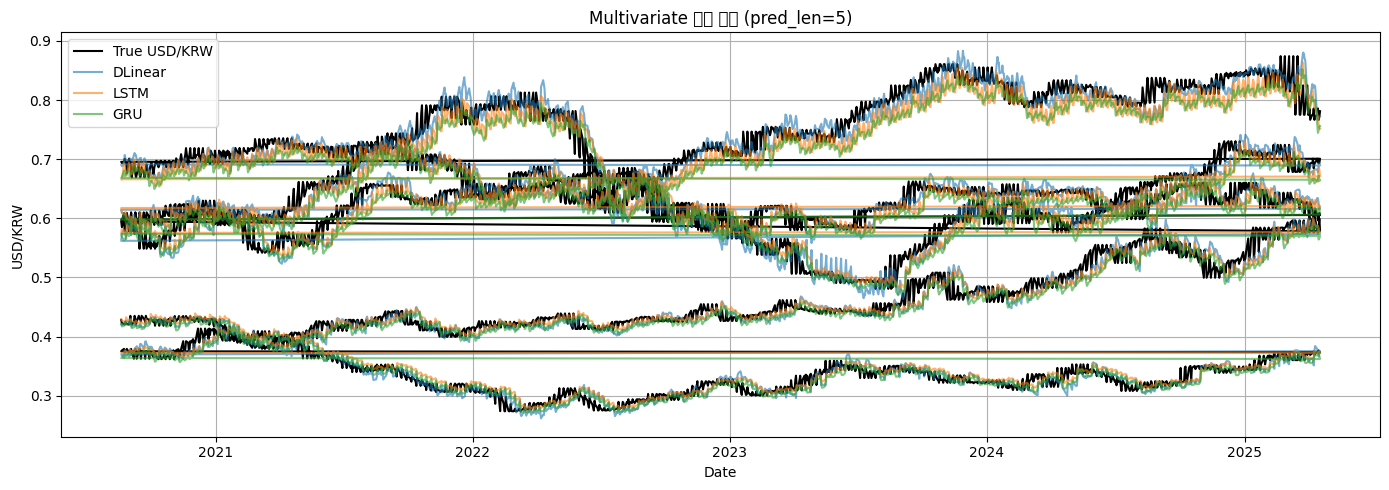

| Model   | RMSE     | MAE     |
|---------|----------|---------|
| DLinear |   0.0192 |   0.0142 |
| LSTM    |   0.0205 |   0.0152 |
| GRU     |   0.0226 |   0.0176 |


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#데이터 불러오기 및 정렬
df = pd.read_csv('/content/병합ver3.csv')  # 파일 업로드 필요
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

#변수 선택
columns = ['USD/KRW']
df = df[['날짜'] + columns].dropna()

#정규화 (각 변수 개별 MinMax scaling)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled, columns=columns)

#파라미터
seq_len = 96
pred_len = 5
input_dim = len(columns)
target_idx = 0  # 'USD/KRW'
train_size = int(len(scaled_df) * 0.8)
lr = 0.001
batch_size = 16
epochs = 20

train_data = scaled[:train_size]
test_data = scaled[train_size:]

#Dataset 클래스 정의
class MultivariateDataset(Dataset):
    def __init__(self, data, seq_len, pred_len, target_idx):
        self.X, self.Y = [], []
        for i in range(len(data) - seq_len - pred_len):
            x = data[i:i+seq_len]
            y = data[i+seq_len:i+seq_len+pred_len, target_idx]  # 예측: USD/KRW
            self.X.append(x)
            self.Y.append(y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = MultivariateDataset(train_data, seq_len, pred_len, target_idx)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

#모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim):
        super(DLinear, self).__init__()
        self.linear_s = nn.Linear(seq_len, pred_len)
        self.linear_t = nn.Linear(seq_len, pred_len)
        self.input_dim = input_dim

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        s_out = self.linear_s(seasonal.permute(0, 2, 1))
        t_out = self.linear_t(trend.permute(0, 2, 1))
        output = s_out + t_out + seq_last.permute(0, 2, 1)
        return output[:, 0, :].unsqueeze(-1)

class LSTMModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out.unsqueeze(-1)

class GRUModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out.unsqueeze(-1)

#학습 함수
def train_model(model, train_dl):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for x, y in train_dl:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

#슬라이딩 예측 함수
def sliding_predict(model, test_data, scaler, seq_len, pred_len, target_idx):
    model.eval()
    true_all, pred_all = [], []
    with torch.no_grad():
        for i in range(0, len(test_data) - seq_len - pred_len + 1):
            x = test_data[i:i+seq_len].reshape(1, seq_len, input_dim)
            y = test_data[i+seq_len:i+seq_len+pred_len, target_idx].reshape(pred_len, 1)

            x_tensor = torch.tensor(x, dtype=torch.float32)
            pred_tensor = model(x_tensor).squeeze(0).numpy()
            y_true = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_pred = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_true[:, target_idx] = y.squeeze()
            y_pred[:, target_idx] = pred_tensor.squeeze()

            true_all.extend(y_true[:, target_idx])
            pred_all.extend(y_pred[:, target_idx])

    rmse = mean_squared_error(true_all, pred_all) ** 0.5
    mae = mean_absolute_error(true_all, pred_all)
    return true_all, pred_all, rmse, mae

#모델 실행 및 시각화
results = {}

# DLinear
dlinear = DLinear(seq_len, pred_len, input_dim)
train_model(dlinear, train_dl)
true_d, pred_d, rmse_d, mae_d = sliding_predict(dlinear, test_data, scaler, seq_len, pred_len, target_idx)
results['DLinear'] = (rmse_d, mae_d)

# LSTM
lstm = LSTMModel(pred_len, input_dim)
train_model(lstm, train_dl)
true_l, pred_l, rmse_l, mae_l = sliding_predict(lstm, test_data, scaler, seq_len, pred_len, target_idx)
results['LSTM'] = (rmse_l, mae_l)

# GRU
gru = GRUModel(pred_len, input_dim)
train_model(gru, train_dl)
true_g, pred_g, rmse_g, mae_g = sliding_predict(gru, test_data, scaler, seq_len, pred_len, target_idx)
results['GRU'] = (rmse_g, mae_g)

#날짜 확장: 예측 개수와 맞게 늘리기
base_index = train_size + seq_len + pred_len - 1
base_dates = df['날짜'].values[base_index:]
repeat_factor = len(true_d) // len(base_dates)
full_dates = np.tile(base_dates, repeat_factor + 1)[:len(true_d)]

#시각화: 모든 슬라이딩 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(full_dates, true_d, label='True USD/KRW', color='black')
plt.plot(full_dates, pred_d, label='DLinear', alpha=0.6)
plt.plot(full_dates, pred_l, label='LSTM', alpha=0.6)
plt.plot(full_dates, pred_g, label='GRU', alpha=0.6)
plt.title(f'Multivariate 예측 비교 (pred_len={pred_len})')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#성능 출력
print("| Model   | RMSE     | MAE     |")
print("|---------|----------|---------|")
for name, (rmse, mae) in results.items():
    print(f"| {name:<7} | {rmse:8.4f} | {mae:8.4f} |")


# Dlinear, LSTM, GRU 모델 비교
[param]
- 입력 변수: USD/KRW
- 입력 데이터: 96
- 예측 데이터: 1

<ipython-input-23-4cd368e2bc1f>:172: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-4cd368e2bc1f>:172: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-4cd368e2bc1f>:172: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-4cd368e2bc1f>:172: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

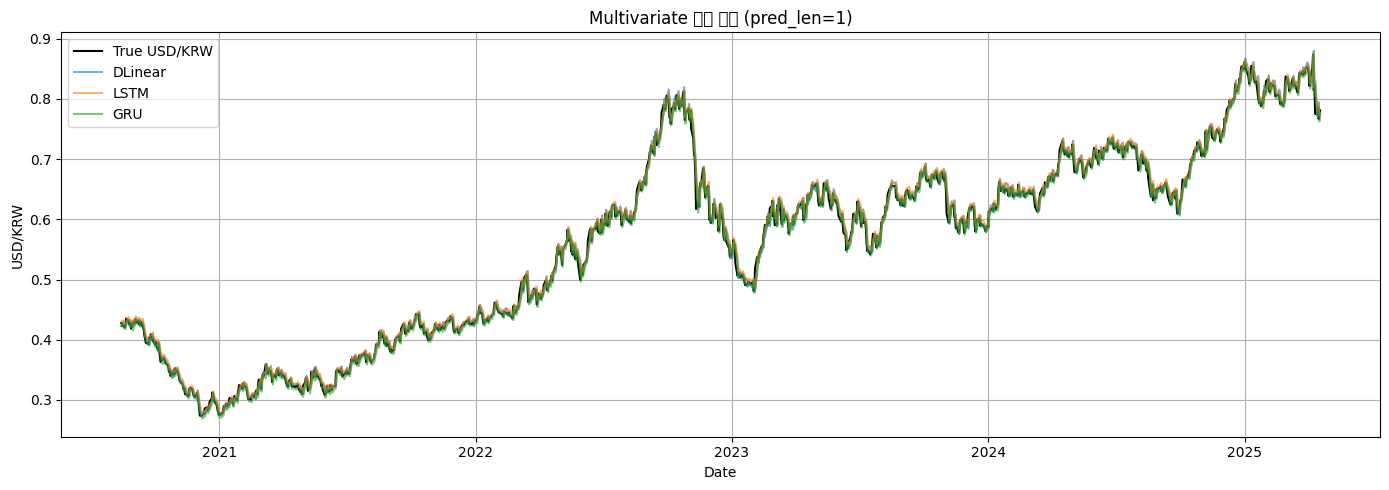

| Model   | RMSE     | MAE     |
|---------|----------|---------|
| DLinear |   0.0111 |   0.0084 |
| LSTM    |   0.0116 |   0.0087 |
| GRU     |   0.0110 |   0.0084 |


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#데이터 불러오기 및 정렬
df = pd.read_csv('/content/병합ver3.csv')  # 파일 업로드 필요
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

#변수 선택
columns = ['USD/KRW']
df = df[['날짜'] + columns].dropna()

#정규화 (각 변수 개별 MinMax scaling)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled, columns=columns)

#파라미터
seq_len = 96
pred_len = 1
input_dim = len(columns)
target_idx = 0  # 'USD/KRW'
train_size = int(len(scaled_df) * 0.8)
lr = 0.001
batch_size = 16
epochs = 20

train_data = scaled[:train_size]
test_data = scaled[train_size:]

#Dataset 클래스 정의
class MultivariateDataset(Dataset):
    def __init__(self, data, seq_len, pred_len, target_idx):
        self.X, self.Y = [], []
        for i in range(len(data) - seq_len - pred_len):
            x = data[i:i+seq_len]
            y = data[i+seq_len:i+seq_len+pred_len, target_idx]  # 예측: USD/KRW
            self.X.append(x)
            self.Y.append(y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = MultivariateDataset(train_data, seq_len, pred_len, target_idx)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

#모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim):
        super(DLinear, self).__init__()
        self.linear_s = nn.Linear(seq_len, pred_len)
        self.linear_t = nn.Linear(seq_len, pred_len)
        self.input_dim = input_dim

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        s_out = self.linear_s(seasonal.permute(0, 2, 1))
        t_out = self.linear_t(trend.permute(0, 2, 1))
        output = s_out + t_out + seq_last.permute(0, 2, 1)
        return output[:, 0, :].unsqueeze(-1)

class LSTMModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out.unsqueeze(-1)

class GRUModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out.unsqueeze(-1)

#학습 함수
def train_model(model, train_dl):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for x, y in train_dl:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

#슬라이딩 예측 함수
def sliding_predict(model, test_data, scaler, seq_len, pred_len, target_idx):
    model.eval()
    true_all, pred_all = [], []
    with torch.no_grad():
        for i in range(0, len(test_data) - seq_len - pred_len + 1):
            x = test_data[i:i+seq_len].reshape(1, seq_len, input_dim)
            y = test_data[i+seq_len:i+seq_len+pred_len, target_idx].reshape(pred_len, 1)

            x_tensor = torch.tensor(x, dtype=torch.float32)
            pred_tensor = model(x_tensor).squeeze(0).numpy()
            y_true = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_pred = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_true[:, target_idx] = y.squeeze()
            y_pred[:, target_idx] = pred_tensor.squeeze()

            true_all.extend(y_true[:, target_idx])
            pred_all.extend(y_pred[:, target_idx])

    rmse = mean_squared_error(true_all, pred_all) ** 0.5
    mae = mean_absolute_error(true_all, pred_all)
    return true_all, pred_all, rmse, mae

#모델 실행 및 시각화
results = {}

# DLinear
dlinear = DLinear(seq_len, pred_len, input_dim)
train_model(dlinear, train_dl)
true_d, pred_d, rmse_d, mae_d = sliding_predict(dlinear, test_data, scaler, seq_len, pred_len, target_idx)
results['DLinear'] = (rmse_d, mae_d)

# LSTM
lstm = LSTMModel(pred_len, input_dim)
train_model(lstm, train_dl)
true_l, pred_l, rmse_l, mae_l = sliding_predict(lstm, test_data, scaler, seq_len, pred_len, target_idx)
results['LSTM'] = (rmse_l, mae_l)

# GRU
gru = GRUModel(pred_len, input_dim)
train_model(gru, train_dl)
true_g, pred_g, rmse_g, mae_g = sliding_predict(gru, test_data, scaler, seq_len, pred_len, target_idx)
results['GRU'] = (rmse_g, mae_g)

#날짜 확장: 예측 개수와 맞게 늘리기
base_index = train_size + seq_len + pred_len - 1
base_dates = df['날짜'].values[base_index:]
repeat_factor = len(true_d) // len(base_dates)
full_dates = np.tile(base_dates, repeat_factor + 1)[:len(true_d)]

#시각화: 모든 슬라이딩 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(full_dates, true_d, label='True USD/KRW', color='black')
plt.plot(full_dates, pred_d, label='DLinear', alpha=0.6)
plt.plot(full_dates, pred_l, label='LSTM', alpha=0.6)
plt.plot(full_dates, pred_g, label='GRU', alpha=0.6)
plt.title(f'Multivariate 예측 비교 (pred_len={pred_len})')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#성능 출력
print("| Model   | RMSE     | MAE     |")
print("|---------|----------|---------|")
for name, (rmse, mae) in results.items():
    print(f"| {name:<7} | {rmse:8.4f} | {mae:8.4f} |")


# Dlinear, LSTM, GRU 모델 비교
[param]
- 입력 변수: 'USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold'
- 입력 데이터: 96
- 예측 데이터: 5

<ipython-input-22-fddf1b669156>:172: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-fddf1b669156>:172: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-fddf1b669156>:172: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-fddf1b669156>:172: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

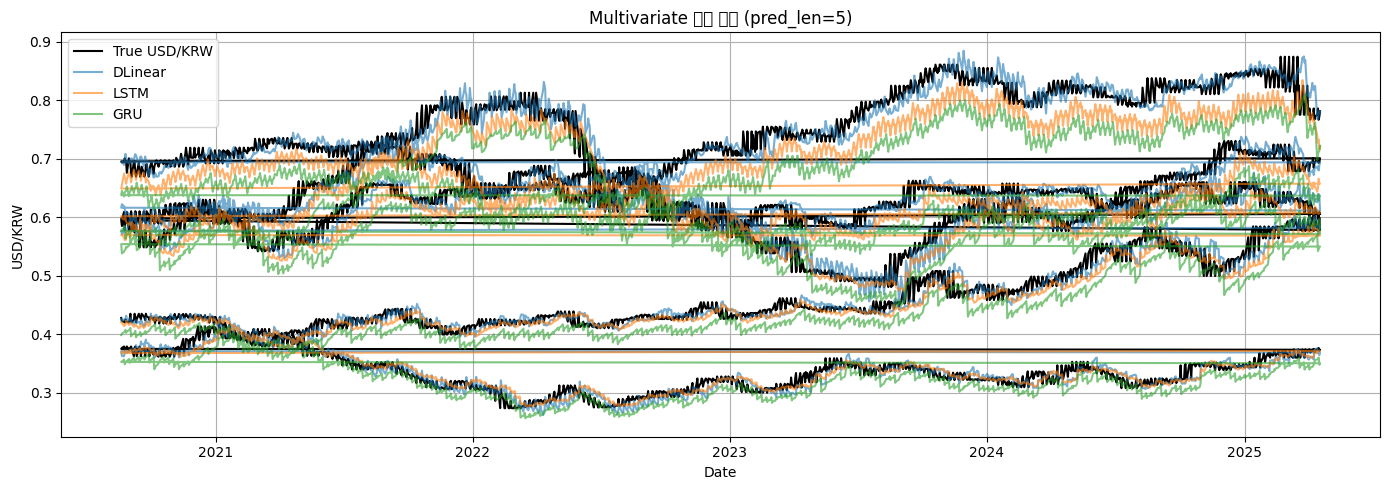

| Model   | RMSE     | MAE     |
|---------|----------|---------|
| DLinear |   0.0190 |   0.0141 |
| LSTM    |   0.0269 |   0.0206 |
| GRU     |   0.0424 |   0.0365 |


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#데이터 불러오기 및 정렬
df = pd.read_csv('/content/병합ver3.csv')  # 파일 업로드 필요
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

#변수 선택
columns = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold']
df = df[['날짜'] + columns].dropna()

#정규화 (각 변수 개별 MinMax scaling)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled, columns=columns)

#파라미터
seq_len = 96
pred_len = 5
input_dim = len(columns)
target_idx = 0  # 'USD/KRW'
train_size = int(len(scaled_df) * 0.8)
lr = 0.001
batch_size = 16
epochs = 20

train_data = scaled[:train_size]
test_data = scaled[train_size:]

#Dataset 클래스 정의
class MultivariateDataset(Dataset):
    def __init__(self, data, seq_len, pred_len, target_idx):
        self.X, self.Y = [], []
        for i in range(len(data) - seq_len - pred_len):
            x = data[i:i+seq_len]
            y = data[i+seq_len:i+seq_len+pred_len, target_idx]  # 예측: USD/KRW
            self.X.append(x)
            self.Y.append(y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = MultivariateDataset(train_data, seq_len, pred_len, target_idx)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

#모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim):
        super(DLinear, self).__init__()
        self.linear_s = nn.Linear(seq_len, pred_len)
        self.linear_t = nn.Linear(seq_len, pred_len)
        self.input_dim = input_dim

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        s_out = self.linear_s(seasonal.permute(0, 2, 1))
        t_out = self.linear_t(trend.permute(0, 2, 1))
        output = s_out + t_out + seq_last.permute(0, 2, 1)
        return output[:, 0, :].unsqueeze(-1)

class LSTMModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out.unsqueeze(-1)

class GRUModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out.unsqueeze(-1)

#학습 함수
def train_model(model, train_dl):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for x, y in train_dl:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

#슬라이딩 예측 함수
def sliding_predict(model, test_data, scaler, seq_len, pred_len, target_idx):
    model.eval()
    true_all, pred_all = [], []
    with torch.no_grad():
        for i in range(0, len(test_data) - seq_len - pred_len + 1):
            x = test_data[i:i+seq_len].reshape(1, seq_len, input_dim)
            y = test_data[i+seq_len:i+seq_len+pred_len, target_idx].reshape(pred_len, 1)

            x_tensor = torch.tensor(x, dtype=torch.float32)
            pred_tensor = model(x_tensor).squeeze(0).numpy()
            y_true = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_pred = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_true[:, target_idx] = y.squeeze()
            y_pred[:, target_idx] = pred_tensor.squeeze()

            true_all.extend(y_true[:, target_idx])
            pred_all.extend(y_pred[:, target_idx])

    rmse = mean_squared_error(true_all, pred_all) ** 0.5
    mae = mean_absolute_error(true_all, pred_all)
    return true_all, pred_all, rmse, mae

#모델 실행 및 시각화
results = {}

# DLinear
dlinear = DLinear(seq_len, pred_len, input_dim)
train_model(dlinear, train_dl)
true_d, pred_d, rmse_d, mae_d = sliding_predict(dlinear, test_data, scaler, seq_len, pred_len, target_idx)
results['DLinear'] = (rmse_d, mae_d)

# LSTM
lstm = LSTMModel(pred_len, input_dim)
train_model(lstm, train_dl)
true_l, pred_l, rmse_l, mae_l = sliding_predict(lstm, test_data, scaler, seq_len, pred_len, target_idx)
results['LSTM'] = (rmse_l, mae_l)

# GRU
gru = GRUModel(pred_len, input_dim)
train_model(gru, train_dl)
true_g, pred_g, rmse_g, mae_g = sliding_predict(gru, test_data, scaler, seq_len, pred_len, target_idx)
results['GRU'] = (rmse_g, mae_g)

#날짜 확장: 예측 개수와 맞게 늘리기
base_index = train_size + seq_len + pred_len - 1
base_dates = df['날짜'].values[base_index:]
repeat_factor = len(true_d) // len(base_dates)
full_dates = np.tile(base_dates, repeat_factor + 1)[:len(true_d)]

#시각화: 모든 슬라이딩 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(full_dates, true_d, label='True USD/KRW', color='black')
plt.plot(full_dates, pred_d, label='DLinear', alpha=0.6)
plt.plot(full_dates, pred_l, label='LSTM', alpha=0.6)
plt.plot(full_dates, pred_g, label='GRU', alpha=0.6)
plt.title(f'Multivariate 예측 비교 (pred_len={pred_len})')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#성능 출력
print("| Model   | RMSE     | MAE     |")
print("|---------|----------|---------|")
for name, (rmse, mae) in results.items():
    print(f"| {name:<7} | {rmse:8.4f} | {mae:8.4f} |")


# Dlinear, LSTM, GRU 모델 비교
[param]
- 입력 변수: 'USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold'
- 입력 데이터: 96
- 예측 데이터: 1

<ipython-input-17-c9a71e415dcb>:172: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-c9a71e415dcb>:172: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-c9a71e415dcb>:172: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-c9a71e415dcb>:172: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

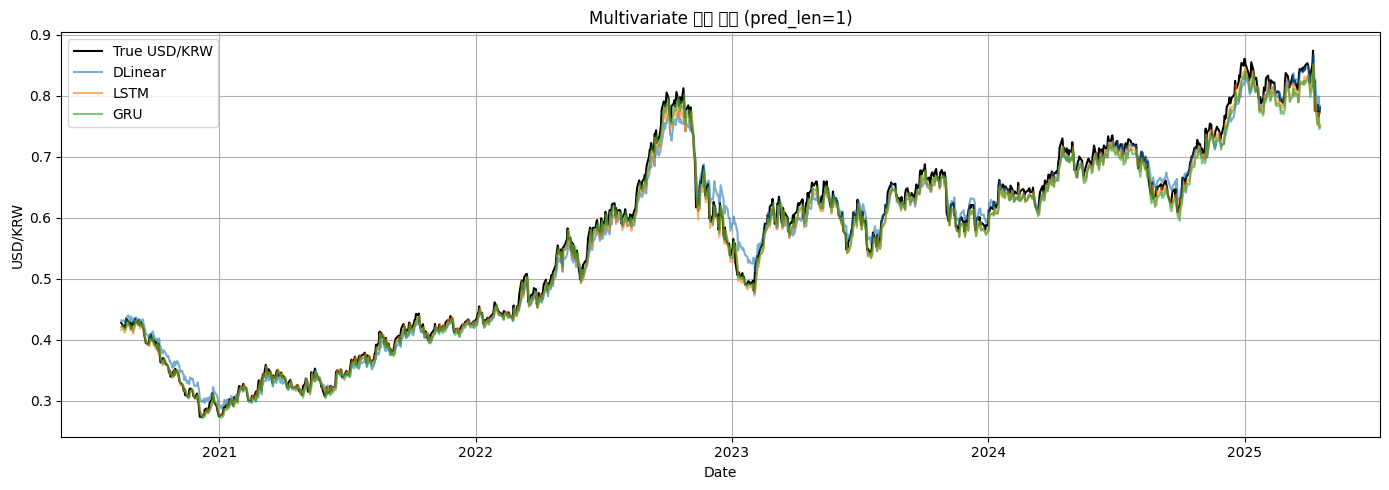

| Model   | RMSE     | MAE     |
|---------|----------|---------|
| DLinear |   0.0181 |   0.0138 |
| LSTM    |   0.0140 |   0.0109 |
| GRU     |   0.0145 |   0.0115 |


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#데이터 불러오기 및 정렬
df = pd.read_csv('/content/병합ver3.csv')  # 파일 업로드 필요
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

#변수 선택
columns = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold']
df = df[['날짜'] + columns].dropna()

#정규화 (각 변수 개별 MinMax scaling)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled, columns=columns)

#파라미터
seq_len = 96
pred_len = 1
input_dim = len(columns)
target_idx = 0  # 'USD/KRW'
train_size = int(len(scaled_df) * 0.8)
lr = 0.001
batch_size = 16
epochs = 20

train_data = scaled[:train_size]
test_data = scaled[train_size:]

#Dataset 클래스 정의
class MultivariateDataset(Dataset):
    def __init__(self, data, seq_len, pred_len, target_idx):
        self.X, self.Y = [], []
        for i in range(len(data) - seq_len - pred_len):
            x = data[i:i+seq_len]
            y = data[i+seq_len:i+seq_len+pred_len, target_idx]  # 예측: USD/KRW
            self.X.append(x)
            self.Y.append(y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = MultivariateDataset(train_data, seq_len, pred_len, target_idx)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

#모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim):
        super(DLinear, self).__init__()
        self.linear_s = nn.Linear(seq_len, pred_len)
        self.linear_t = nn.Linear(seq_len, pred_len)
        self.input_dim = input_dim

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        s_out = self.linear_s(seasonal.permute(0, 2, 1))
        t_out = self.linear_t(trend.permute(0, 2, 1))
        output = s_out + t_out + seq_last.permute(0, 2, 1)
        return output[:, 0, :].unsqueeze(-1)

class LSTMModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out.unsqueeze(-1)

class GRUModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out.unsqueeze(-1)

#학습 함수
def train_model(model, train_dl):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for x, y in train_dl:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

#슬라이딩 예측 함수
def sliding_predict(model, test_data, scaler, seq_len, pred_len, target_idx):
    model.eval()
    true_all, pred_all = [], []
    with torch.no_grad():
        for i in range(0, len(test_data) - seq_len - pred_len + 1):
            x = test_data[i:i+seq_len].reshape(1, seq_len, input_dim)
            y = test_data[i+seq_len:i+seq_len+pred_len, target_idx].reshape(pred_len, 1)

            x_tensor = torch.tensor(x, dtype=torch.float32)
            pred_tensor = model(x_tensor).squeeze(0).numpy()
            y_true = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_pred = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_true[:, target_idx] = y.squeeze()
            y_pred[:, target_idx] = pred_tensor.squeeze()

            true_all.extend(y_true[:, target_idx])
            pred_all.extend(y_pred[:, target_idx])

    rmse = mean_squared_error(true_all, pred_all) ** 0.5
    mae = mean_absolute_error(true_all, pred_all)
    return true_all, pred_all, rmse, mae

#모델 실행 및 시각화
results = {}

# DLinear
dlinear = DLinear(seq_len, pred_len, input_dim)
train_model(dlinear, train_dl)
true_d, pred_d, rmse_d, mae_d = sliding_predict(dlinear, test_data, scaler, seq_len, pred_len, target_idx)
results['DLinear'] = (rmse_d, mae_d)

# LSTM
lstm = LSTMModel(pred_len, input_dim)
train_model(lstm, train_dl)
true_l, pred_l, rmse_l, mae_l = sliding_predict(lstm, test_data, scaler, seq_len, pred_len, target_idx)
results['LSTM'] = (rmse_l, mae_l)

# GRU
gru = GRUModel(pred_len, input_dim)
train_model(gru, train_dl)
true_g, pred_g, rmse_g, mae_g = sliding_predict(gru, test_data, scaler, seq_len, pred_len, target_idx)
results['GRU'] = (rmse_g, mae_g)

#날짜 확장: 예측 개수와 맞게 늘리기
base_index = train_size + seq_len + pred_len - 1
base_dates = df['날짜'].values[base_index:]
repeat_factor = len(true_d) // len(base_dates)
full_dates = np.tile(base_dates, repeat_factor + 1)[:len(true_d)]

#시각화: 모든 슬라이딩 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(full_dates, true_d, label='True USD/KRW', color='black')
plt.plot(full_dates, pred_d, label='DLinear', alpha=0.6)
plt.plot(full_dates, pred_l, label='LSTM', alpha=0.6)
plt.plot(full_dates, pred_g, label='GRU', alpha=0.6)
plt.title(f'Multivariate 예측 비교 (pred_len={pred_len})')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#성능 출력
print("| Model   | RMSE     | MAE     |")
print("|---------|----------|---------|")
for name, (rmse, mae) in results.items():
    print(f"| {name:<7} | {rmse:8.4f} | {mae:8.4f} |")


# Dlinear, LSTM, GRU 모델 비교
[param]
- 입력 변수: 'USD/KRW'
- 입력 데이터: 96
- 예측 데이터: 10

<ipython-input-20-05756badcfbf>:172: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-05756badcfbf>:172: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-05756badcfbf>:172: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-05756badcfbf>:172: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

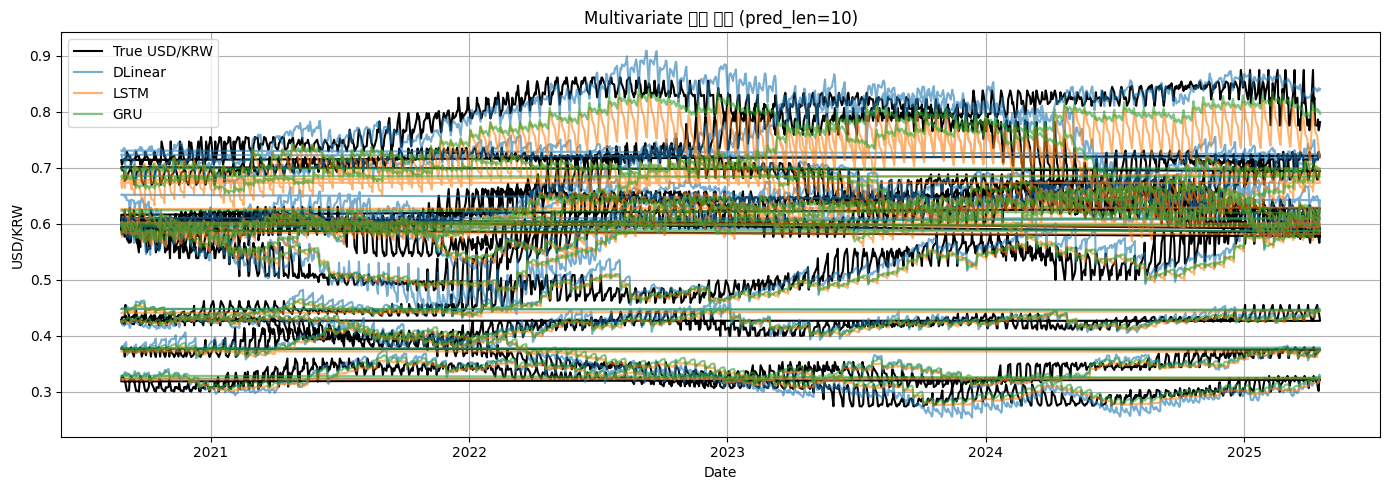

| Model   | RMSE     | MAE     |
|---------|----------|---------|
| DLinear |   0.0264 |   0.0194 |
| LSTM    |   0.0326 |   0.0233 |
| GRU     |   0.0262 |   0.0198 |


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#데이터 불러오기 및 정렬
df = pd.read_csv('/content/병합ver3.csv')  # 파일 업로드 필요
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

#변수 선택
columns = ['USD/KRW']
df = df[['날짜'] + columns].dropna()

#정규화 (각 변수 개별 MinMax scaling)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled, columns=columns)

#파라미터
seq_len = 96
pred_len = 10
input_dim = len(columns)
target_idx = 0  # 'USD/KRW'
train_size = int(len(scaled_df) * 0.8)
lr = 0.001
batch_size = 16
epochs = 20

train_data = scaled[:train_size]
test_data = scaled[train_size:]

#Dataset 클래스 정의
class MultivariateDataset(Dataset):
    def __init__(self, data, seq_len, pred_len, target_idx):
        self.X, self.Y = [], []
        for i in range(len(data) - seq_len - pred_len):
            x = data[i:i+seq_len]
            y = data[i+seq_len:i+seq_len+pred_len, target_idx]  # 예측: USD/KRW
            self.X.append(x)
            self.Y.append(y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = MultivariateDataset(train_data, seq_len, pred_len, target_idx)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

#모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim):
        super(DLinear, self).__init__()
        self.linear_s = nn.Linear(seq_len, pred_len)
        self.linear_t = nn.Linear(seq_len, pred_len)
        self.input_dim = input_dim

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        s_out = self.linear_s(seasonal.permute(0, 2, 1))
        t_out = self.linear_t(trend.permute(0, 2, 1))
        output = s_out + t_out + seq_last.permute(0, 2, 1)
        return output[:, 0, :].unsqueeze(-1)

class LSTMModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out.unsqueeze(-1)

class GRUModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out.unsqueeze(-1)

#학습 함수
def train_model(model, train_dl):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for x, y in train_dl:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

#슬라이딩 예측 함수
def sliding_predict(model, test_data, scaler, seq_len, pred_len, target_idx):
    model.eval()
    true_all, pred_all = [], []
    with torch.no_grad():
        for i in range(0, len(test_data) - seq_len - pred_len + 1):
            x = test_data[i:i+seq_len].reshape(1, seq_len, input_dim)
            y = test_data[i+seq_len:i+seq_len+pred_len, target_idx].reshape(pred_len, 1)

            x_tensor = torch.tensor(x, dtype=torch.float32)
            pred_tensor = model(x_tensor).squeeze(0).numpy()
            y_true = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_pred = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_true[:, target_idx] = y.squeeze()
            y_pred[:, target_idx] = pred_tensor.squeeze()

            true_all.extend(y_true[:, target_idx])
            pred_all.extend(y_pred[:, target_idx])

    rmse = mean_squared_error(true_all, pred_all) ** 0.5
    mae = mean_absolute_error(true_all, pred_all)
    return true_all, pred_all, rmse, mae

#모델 실행 및 시각화
results = {}

# DLinear
dlinear = DLinear(seq_len, pred_len, input_dim)
train_model(dlinear, train_dl)
true_d, pred_d, rmse_d, mae_d = sliding_predict(dlinear, test_data, scaler, seq_len, pred_len, target_idx)
results['DLinear'] = (rmse_d, mae_d)

# LSTM
lstm = LSTMModel(pred_len, input_dim)
train_model(lstm, train_dl)
true_l, pred_l, rmse_l, mae_l = sliding_predict(lstm, test_data, scaler, seq_len, pred_len, target_idx)
results['LSTM'] = (rmse_l, mae_l)

# GRU
gru = GRUModel(pred_len, input_dim)
train_model(gru, train_dl)
true_g, pred_g, rmse_g, mae_g = sliding_predict(gru, test_data, scaler, seq_len, pred_len, target_idx)
results['GRU'] = (rmse_g, mae_g)

#날짜 확장: 예측 개수와 맞게 늘리기
base_index = train_size + seq_len + pred_len - 1
base_dates = df['날짜'].values[base_index:]
repeat_factor = len(true_d) // len(base_dates)
full_dates = np.tile(base_dates, repeat_factor + 1)[:len(true_d)]

#시각화: 모든 슬라이딩 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(full_dates, true_d, label='True USD/KRW', color='black')
plt.plot(full_dates, pred_d, label='DLinear', alpha=0.6)
plt.plot(full_dates, pred_l, label='LSTM', alpha=0.6)
plt.plot(full_dates, pred_g, label='GRU', alpha=0.6)
plt.title(f'Multivariate 예측 비교 (pred_len={pred_len})')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#성능 출력
print("| Model   | RMSE     | MAE     |")
print("|---------|----------|---------|")
for name, (rmse, mae) in results.items():
    print(f"| {name:<7} | {rmse:8.4f} | {mae:8.4f} |")


# Dlinear, LSTM, GRU 모델 비교
[param]
- 입력 변수: 'USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold'
- 입력 데이터: 96
- 예측 데이터: 10

<ipython-input-21-8907690b05e0>:172: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-8907690b05e0>:172: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-8907690b05e0>:172: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-21-8907690b05e0>:172: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

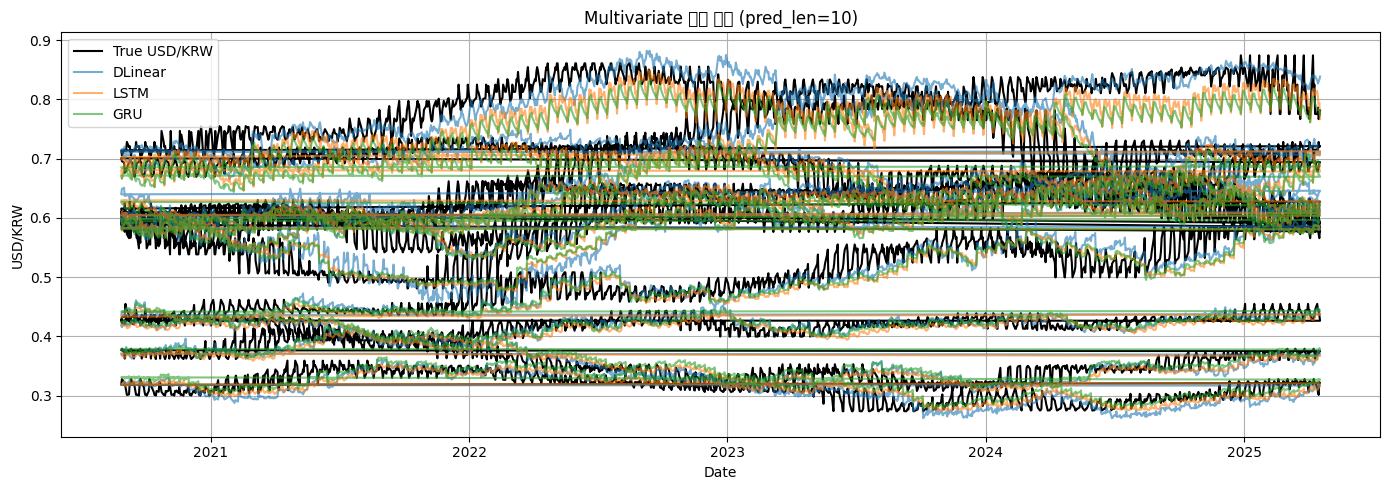

| Model   | RMSE     | MAE     |
|---------|----------|---------|
| DLinear |   0.0252 |   0.0186 |
| LSTM    |   0.0270 |   0.0199 |
| GRU     |   0.0292 |   0.0220 |


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#데이터 불러오기 및 정렬
df = pd.read_csv('/content/병합ver3.csv')  # 파일 업로드 필요
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

#변수 선택
columns = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold']
df = df[['날짜'] + columns].dropna()

#정규화 (각 변수 개별 MinMax scaling)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled, columns=columns)

#파라미터
seq_len = 96
pred_len = 10
input_dim = len(columns)
target_idx = 0  # 'USD/KRW'
train_size = int(len(scaled_df) * 0.8)
lr = 0.001
batch_size = 16
epochs = 20

train_data = scaled[:train_size]
test_data = scaled[train_size:]

#Dataset 클래스 정의
class MultivariateDataset(Dataset):
    def __init__(self, data, seq_len, pred_len, target_idx):
        self.X, self.Y = [], []
        for i in range(len(data) - seq_len - pred_len):
            x = data[i:i+seq_len]
            y = data[i+seq_len:i+seq_len+pred_len, target_idx]  # 예측: USD/KRW
            self.X.append(x)
            self.Y.append(y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.Y = torch.tensor(np.array(self.Y), dtype=torch.float32).unsqueeze(-1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

train_ds = MultivariateDataset(train_data, seq_len, pred_len, target_idx)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

#모델 정의
class DLinear(nn.Module):
    def __init__(self, seq_len, pred_len, input_dim):
        super(DLinear, self).__init__()
        self.linear_s = nn.Linear(seq_len, pred_len)
        self.linear_t = nn.Linear(seq_len, pred_len)
        self.input_dim = input_dim

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()
        x = x - seq_last
        trend = torch.mean(x, dim=1, keepdim=True).expand_as(x)
        seasonal = x - trend
        s_out = self.linear_s(seasonal.permute(0, 2, 1))
        t_out = self.linear_t(trend.permute(0, 2, 1))
        output = s_out + t_out + seq_last.permute(0, 2, 1)
        return output[:, 0, :].unsqueeze(-1)

class LSTMModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out.unsqueeze(-1)

class GRUModel(nn.Module):
    def __init__(self, pred_len, input_dim, hidden_size=64):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, pred_len)
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out.unsqueeze(-1)

#학습 함수
def train_model(model, train_dl):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for x, y in train_dl:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

#슬라이딩 예측 함수
def sliding_predict(model, test_data, scaler, seq_len, pred_len, target_idx):
    model.eval()
    true_all, pred_all = [], []
    with torch.no_grad():
        for i in range(0, len(test_data) - seq_len - pred_len + 1):
            x = test_data[i:i+seq_len].reshape(1, seq_len, input_dim)
            y = test_data[i+seq_len:i+seq_len+pred_len, target_idx].reshape(pred_len, 1)

            x_tensor = torch.tensor(x, dtype=torch.float32)
            pred_tensor = model(x_tensor).squeeze(0).numpy()
            y_true = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_pred = scaler.inverse_transform(
                np.pad(np.zeros((pred_len, input_dim)), ((0,0),(0,0)), constant_values=0)
            )
            y_true[:, target_idx] = y.squeeze()
            y_pred[:, target_idx] = pred_tensor.squeeze()

            true_all.extend(y_true[:, target_idx])
            pred_all.extend(y_pred[:, target_idx])

    rmse = mean_squared_error(true_all, pred_all) ** 0.5
    mae = mean_absolute_error(true_all, pred_all)
    return true_all, pred_all, rmse, mae

#모델 실행 및 시각화
results = {}

# DLinear
dlinear = DLinear(seq_len, pred_len, input_dim)
train_model(dlinear, train_dl)
true_d, pred_d, rmse_d, mae_d = sliding_predict(dlinear, test_data, scaler, seq_len, pred_len, target_idx)
results['DLinear'] = (rmse_d, mae_d)

# LSTM
lstm = LSTMModel(pred_len, input_dim)
train_model(lstm, train_dl)
true_l, pred_l, rmse_l, mae_l = sliding_predict(lstm, test_data, scaler, seq_len, pred_len, target_idx)
results['LSTM'] = (rmse_l, mae_l)

# GRU
gru = GRUModel(pred_len, input_dim)
train_model(gru, train_dl)
true_g, pred_g, rmse_g, mae_g = sliding_predict(gru, test_data, scaler, seq_len, pred_len, target_idx)
results['GRU'] = (rmse_g, mae_g)

#날짜 확장: 예측 개수와 맞게 늘리기
base_index = train_size + seq_len + pred_len - 1
base_dates = df['날짜'].values[base_index:]
repeat_factor = len(true_d) // len(base_dates)
full_dates = np.tile(base_dates, repeat_factor + 1)[:len(true_d)]

#시각화: 모든 슬라이딩 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(full_dates, true_d, label='True USD/KRW', color='black')
plt.plot(full_dates, pred_d, label='DLinear', alpha=0.6)
plt.plot(full_dates, pred_l, label='LSTM', alpha=0.6)
plt.plot(full_dates, pred_g, label='GRU', alpha=0.6)
plt.title(f'Multivariate 예측 비교 (pred_len={pred_len})')
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#성능 출력
print("| Model   | RMSE     | MAE     |")
print("|---------|----------|---------|")
for name, (rmse, mae) in results.items():
    print(f"| {name:<7} | {rmse:8.4f} | {mae:8.4f} |")
